<h1 align="center"> EL7006 </h1>
<h2 align="center"> Tarea 3 </h2>

Conteste cada una de las preguntas en la celda Markdown correspodiente. Si desea, puede re-organizar las preguntas y respuestas como le acomode (procure contestar todo lo que se pide).

In [1]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


**Para poder correr esta parte de la tarea es requisito habilitar los ipython widgets usando:**
~~~
sudo jupyter nbextension enable --py --sys-prefix widgetsnbextension
~~~

# P1) Autocorrelación vs Autocorrentropia
Se tiene una señal sinusoidal con frecuencia fundamental $f_{0}=1.0[Hz]$
contaminada con una combinación de ruido blanco y ruido impulsivo.
El ruido blanco está parametrizado por su varianza. Usted puede controlar
la potencia del ruido blanco calibrando la razón señal a ruido (SNR)
de los datos. El ruido impulsivo se controla aumentando o disminuyendo
el porcentaje de muestras que corresponde a outliers o datos
disparados. 

El objetivo de esta actividad es evaluar dos métricas de similitud
con el fin de recuperar la periodicidad de la señal. La primera métrica
es la auto-correlación clásica, mientras que la segunda es la auto-correntropía.
Considere la expresión de autocorrentropía dada por 
$$
v(\tau)=\frac{1}{\sqrt{2\pi}\sigma}\sum_{n=0}^{\infty}\frac{(-1)^{n}}{2^{n}\sigma^{2n}n!}\mathbb{E}_{t}\left[\|x_{t}-x_{t+\tau}\|^{2n}\right],
$$
 donde el kernel Gaussiano ha sido reemplazado por su expansión en
serie de Taylor. 
1. Demuestre que la autocorrelación, $\mathbb{E}_{t}\left[\langle x_{t},x_{t+\tau}\rangle\right]$, está incluida en la expresión de autocorrentropía. 

Respuesta:

Considerando el termino de la sumatoria para n=1:
$$\frac{(-1)^{1}}{2^{1}\sigma^{2*1}1!}\mathbb{E}_{t}\left[\|x_{t}-x_{t+\tau}\|^{2*1}\right]=\frac{-1}{2\sigma^{2}}\mathbb{E}_{t}\left[\|x_{t}-x_{t+\tau}\|^{2}\right]=\frac{-1}{2\sigma^{2}}\mathbb{E}_{t}\left[ \|x_{t}\|^2-2 \langle x_t,x_{t+\tau} \rangle+ \|x_{t+\tau}\|^2 \right]$$
Al utilizar la propiedad de la linealidad se tiene:
$$ \mathbb{E}_{t}\left[ \|x_{t}\|^2 \right] -2\mathbb{E}_{t}\left[\langle x_t,x_{t+\tau} \rangle \right] + \mathbb{E}_{t}\left[\|x_{t+\tau}\|^2\right]$$
Donde se identifica la autocorrelación incluida en el termino correspondiente a $n=1$ en la expresión de autocorrentropía.

2. Muestre que al aumentar el valor del ancho de banda del kernel la autocorrentropía se reduce a la autocorrelación sesgada. 

Respuesta:

Se observa que los términos de la autocorrelación están multiplicados por un factor $\frac{1}{\sigma^{2n}}$ al aumentar este valor, para todo valor de $\sigma>1.0$ los terminos de $n>1$ reducen drásticamente (de forma exponencial) el factor por el que son multiplicados "desvaneciendo" y haciendo que tome mayor relevancia el término para n=1, que como se mostró anteriormente es igual a la autocorrelación sumándole otros valores y multiplicada por constantes, es por esto que se llama correlación sesgada al ser de la forma: $K\cdot\mathbb{E}_{t}\left[\langle x_{t},x_{t+\tau}\rangle\right]+C$

3. ¿Qué son los momentos de orden superior? ¿Por qué la autocorrentropía tiene un mejor desempeño que la autocorrelación cuando la señal de interés es no-Gaussiana?


Respuesta:
Los momentos de orden superior son aquellos que tienen un grado mayor estrictamente a 2 , ya que con 1 y 2 se tiene la media y la varianza. Para señales Gaussianas, debido a su simetría y forma, la varianza y la media entregan la información más relevante que describe la distribuión. Sin embargo, cuando no hay supuestos de gaussianidad ni linearidad las distribuciones podrían requerir de momentos de orden superior para ser descrítas como la skewness(3er orden), curtosis(4to orden), etc. La autocorrentropía contiene en su definición infinitos momentos superiores pares, mientras que la autocorrelación considera hasta el segundo momento. 

Utilice los controles (sliders) de la interfaz para modificar la señal.
Para cada uno de los siguientes escenarios analice y compare los resultados obtenidos por las métricas, enfatizando el comportamiento de correntropía ante distintos anchos de banda de kernel. ¿En qué casos es posible
recuperar la frecuencia fundamental? Notar que el valor que usted modifica es un factor veces el ancho de banda de Silverman.
1. Outlier threshold=0, SNR = {2.0, 1.0, 0.5, 0.0} 
1. SNR=1.0, Outlier threshold=0, SNR = {0.0, 0.1, 0.2, 0.3}

Respuesta:

1. En el primer caso en que no hay ruido impulsivo y el ruido generado es ruido blanco parametrizado por su varianza, pese a aumentar el ruido (disminuir SNR), la correlación logra detectar bien los peaks de la frecuencia fundamental y sus múltiplos, esto es esperable debido a que el ruido se identifica solamente con el segundo momento. De esta forma a partir de un ancho de banda Silverman como tamañano de ancho de banda del kernel si bien se detectan peaks en la correntropía, estos no son muy agudos. 

![](im1.png). 

Como se mostró anteriormente, al aumentar el valor del ancho de banda del kernel la correntroía se reduce a la correlación con un sesgo y en este caso de ruido blanco ese es el caso que presenta peaks más agudos pero con un menor valor, lo cual es esperable ya que los elementos de la correntrpía están multiplicados por un menor factor.

![](im2.png)

Para casos con menor ruido (aumento de SNR) se prefiere la correntropía por presentar peaks más agudos. Sin embargo, este caso no es muy representativo de la realidad.

![](im3.png)

2. En el segundo caso en que se introduce ruido impulsivo se observa la superioridad de la correntropía en situaciones sin supuestos de Gaussianidad, detectando de manera mucho más notoria los peaks de la frecuencia fundamental y sus múltiplos para los distintos porcentajes de presencia de ruido impulsivo. Imagen de ejemplo con SNR=1.0, ancho de banda de Silverman y Outlier threshold de 0.1:

![](snr1_k1_out01.png)

Responda:
1. ¿Cúal es la relación entre la correntropía, la covarianza generalizada y la densidad espectral de correntropía?

Sea $\left\{X_t,t\in T \right\}$ un proceso aleatorio estrictamente estacionario, con $T$ un conjunto de índices y $x_t\in \mathbb{R}^d$.
La información que provee la función de covarianza convencional está incluida en la auto-correntropía, esto ya que el termino para n=1 es proporcional a $$var_{x_{t1}}+var_{x_{t2}}-2R_x(t1,t2)$$ utilizando la expansión de taylor usando kernel Gaussiano. La función de auto-correntropía define una función de correlación generalizada en términos de productos internos de vectores en un espacio de características de kernel. Ya que los productos internos son medidas de similitud, la función de auto-correntropía mide la similitud entre pares de vectores de características.
La funciín de auto-correntropía no es integrable debido al bias, por esto se define la auto-correntropía centrada como: $$u(t1,t2)=E_{x_{t_1}x_{t_2}}[G_{\sigma}(x_{t_1}-x_{t_2})]-E_{x_{t_1}}E_{x_{t_2}}[G_{\sigma}(x_{t_1}-x_{t_2})],\forall t_1,t_2\in T$$ que es cuadráticamente integrable, y por lo tanto su transformada de Fourier existe. La transformada de Fourier de la función de auto-correntropía centrada se conoce como la densidad 
espectral de correntropía:
$$P_{\sigma}(\omega)=\int_{-\infty}^{\infty}u(\tau)e^{-j\omega\tau}d\tau$$
La densidad espectral de la autocorrentropía muestra cómo varían las relaciones de orden superior de la señal en distintas frecuencias.

2. Formule un procedimiento automático de detección de periodicidad basándose en correntropía. ¿Qué herramientas estadísticas y/o de procesamiento de señales usaría?

Como se relizó en el trabajo de "LOS PABLOS" para curvas de luz, el procedimiento automático de detección de periodicidad se basa en utilizar la correntropía y relizar una factorización por matrices no-negativas. Para una matriz de datos de correntropía $V$, una matriz diccionario $W$, matriz de coeficientes $H$, y una representación $\hat{V}$ la data puede ser descompuesta como:
$$V\approx\hat{V}=WH$$
resolviendo
$$\min_{W,H}\|V-WH\|_F^2 \text{ s.t. }  W\geq 0, H\geq 0$$
para esto se utiliza una base no sinusoidal. Se descompone la correntroía en un conjunto sobrecompleto de átomos indexados pro frecuancia. En el trabajo expuesto en clases se utiliza una extensión del kernel Gaussiano:
$$k_{\sigma _k}(\tau _n,f_k)=\exp(-\frac{2sin^2(\pi f_k \tau _n)}{\sigma _k^2})$$

![](base_periodica.png)

Con esta recomposición se logra super-resolución (diferenciación entre distintas señales), y peaks más localizados, agudos y más exactos (se evitan múltiples peaks) como se puede apreciar en la siguiente imagen donde se compara con la correntropía y densidad espectral de la autocorrentropía:

![](comparativa.png)

## Código P1

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib
import ipywidgets as widgets
from IPython.display import display, clear_output

In [3]:
f0 = 1.0       # Frecuencia
N = 1000       # Numero de datos
x = np.linspace(0.0, 10.0, num=N)
y = np.sin(2.0*np.pi*x)
nu1 = np.random.randn(N)
p = np.random.rand(N)

def auto_correlation(x, y):
    N = len(y)
    Fs = N/(x[-1]-x[0])
    max_lag = int(0.5*N)
    lag = np.arange(0.0, x[max_lag-1], step=1.0/Fs)
    c = np.zeros(shape=(max_lag,))
    mu_y = np.mean(y)
    for m in range(max_lag):
        for n in range(m, N):
            c[m] += (y[n]-mu_y)*(y[n-m]-mu_y)
        c[m] = c[m]/(N-m+1)
    return lag, c

def auto_correntropy(x, y, kernel_size_factor):
    N = len(y)
    iqr = np.percentile(y, 75) - np.percentile(y, 25)
    kernel_size = kernel_size_factor*1.06*np.amin([np.std(y), iqr/1.349])*N**(-0.2)
    Fs = N/(x[-1]-x[0])
    max_lag = int(0.5*N)
    lag = np.arange(0.0, x[max_lag-1], step=1.0/Fs)
    v = np.zeros(shape=(max_lag,))
    for m in range(max_lag):
        for n in range(m, N):
            v[m] += np.exp(-0.5*(y[n]-y[n-m])**2/kernel_size**2)
        v[m] = v[m]/(kernel_size*np.sqrt(2.0*np.pi)*(N-m+1))
    return lag, v

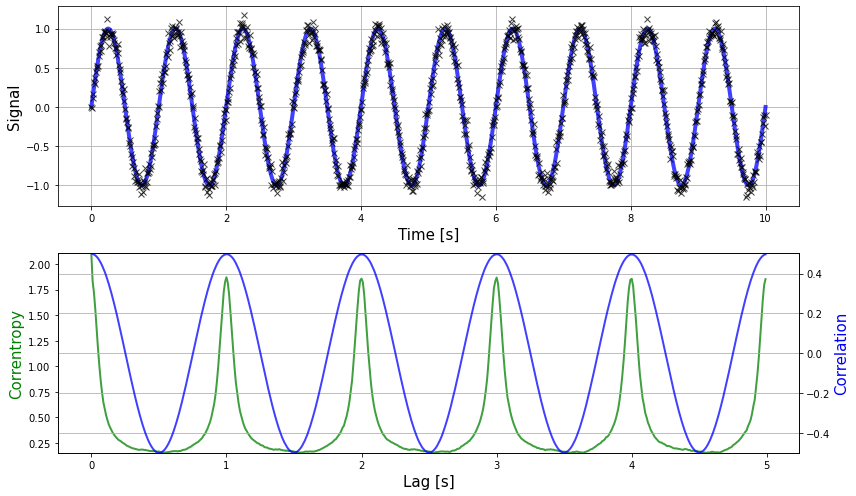

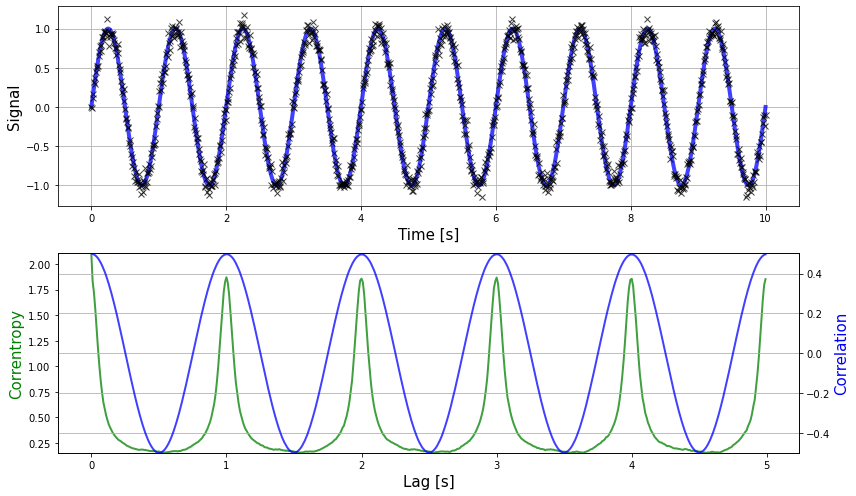

In [4]:
slider_snr = widgets.FloatSlider(description='SNR', value=2.0, 
                                 min=0.0, max=2.0, step=0.1, continuous_update=False)
slider_ks = widgets.FloatSlider(description='Kernel size factor', value=1.0, 
                                min=0.1, max=10.0, step=0.1, continuous_update=False)
slider_out = widgets.FloatSlider(description='Outlier th', value=0.0, 
                                min=0.0, max=0.5, step=0.1, continuous_update=False)
slider_snr.layout.width='60%'
slider_ks.layout.width='60%'
slider_out.layout.width='60%'

plt.close()
fig = plt.figure(figsize=(12, 7))

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(x, y, 'b-', linewidth=4, alpha=0.75)
z = y + nu1*np.sqrt(1.0/(2*10**slider_snr.value))
l1, = ax1.plot(x, z, 'kx', alpha=0.75)
ax1.set_ylabel('Signal',fontsize=15)
ax1.set_xlabel('Time [s]',fontsize=15)
plt.grid()

ax2 = fig.add_subplot(2, 1, 2)
ax3 = ax2.twinx()
lag, v = auto_correntropy(x, z, slider_ks.value)
lag, c = auto_correlation(x, z)
plt.grid()
l2, = ax2.plot(lag, v, 'g-', linewidth=2, alpha=0.75)
ax2.set_ylim([np.amin(v), np.amax(v)])
ax2.set_xlabel('Lag [s]',fontsize=15)
ax2.set_ylabel('Correntropy',color='g',fontsize=15)
ax3.set_ylabel('Correlation',color='b',fontsize=15)
l3, = ax3.plot(lag, c, 'b-', linewidth=2, alpha=0.75)
ax3.set_ylim([np.amin(c), np.amax(c)])
plt.tight_layout()
display(widgets.VBox((slider_snr, slider_ks, slider_out)))
display(fig)

def callback_snr(change):
    SNR = change['new']
    z = y + nu1*np.sqrt(1.0/(2*10**SNR))
    out_pbb = slider_out.value
    z[p > 1.0 - out_pbb] += 10*np.std(z)
    l1.set_ydata(z)
    ks_factor = slider_ks.value
    lag, v = auto_correntropy(x, z, ks_factor)
    lag, c = auto_correlation(x, z)
    l2.set_ydata(v)
    ax2.set_ylim([np.amin(v), np.amax(v)])
    l3.set_ydata(c)
    ax3.set_ylim([np.amin(c), np.amax(c)])
    clear_output()
    display(widgets.VBox((slider_snr, slider_ks, slider_out)))
    display(fig)
    
def callback_ks(change):
    ks_factor = change['new']
    out_pbb = slider_out.value
    SNR = slider_snr.value
    z = y + nu1*np.sqrt(1.0/(2*10**SNR))
    z[p > 1.0 - out_pbb] += 10*np.std(z)
    lag, v = auto_correntropy(x, z, ks_factor)
    l2.set_ydata(v)
    ax2.set_ylim([np.amin(v), np.amax(v)])
    clear_output()
    display(widgets.VBox((slider_snr, slider_ks, slider_out)))
    display(fig)
    
def callback_out(change):
    out_pbb = change['new']
    SNR = slider_snr.value
    ks_factor = slider_ks.value
    z = y + nu1*np.sqrt(1.0/(2*10**SNR))
    z[p > 1.0 - out_pbb] += 10*np.std(z)
    lag, c = auto_correlation(x, z)
    lag, v = auto_correntropy(x, z, ks_factor)
    l1.set_ydata(z)
    l2.set_ydata(v)
    ax2.set_ylim([np.amin(v), np.amax(v)])
    l3.set_ydata(c)
    ax3.set_ylim([np.amin(c), np.amax(c)])
    clear_output()
    display(widgets.VBox((slider_snr, slider_ks, slider_out)))
    display(fig)
    
slider_snr.observe(callback_snr, names='value')
slider_ks.observe(callback_ks, names='value')
slider_out.observe(callback_out, names='value')

# P2) Proyección usando PCA

Se tiene un conjunto de datos bidimensionales (Figura 1), generados por dos distribuciones distintas (bi-modalidad). En este problema se busca encontrar una proyección o representación de una dimensión que separe lo mejor posible los datos provenientes de cada uno de los modos de la distribución. Un método clásico para realizar esta labor es Análisis de Componentes Principales (PCA).  En PCA se calcula la matriz de covarianza de los datos, para luego encontrar ejes de proyección en los vectores propios de dicha matriz. Este proceso puede generalizarse reemplazado la matriz de covarianza por la matriz de correntropía centrada<sup>1</sup>. 

1. ¿Qué ventaja teórica tiene usar la matriz de correntropía centrada en vez de la matriz de covarianza para realizar proyecciones? ¿Qué ventaja tiene la proyección de correntropía versus una proyección KPCA con kernel Gaussiano?

PCA proporciona un subespacio lineal de menor dimensión que mejor representa los datos completos según un criterio de error cuadrático mínimo, si no hay supuestos de gaussianidad en los datos esta representación podría no ser buena, es en este escenario que la matriz de correntropía presenta una estructura más robusta a este tipo de distribuciones y podría permitir una mejor representación.
El Kernel PCA <sup>2</sup> resuelve la descomposición en autovalores de la matriz Gram de los datos de entrada en un espacio de características de alta dimensión. La matriz Gram tiene una dimensión dada por el número de muestras N. Las proyecciones de los datos sobre las direcciones principales de la matriz Gram, es decir, el producto interno en el espacio de características, se llevan a cabo mediante funciones kernel en el espacio de entrada. Si bien el uso de kernels de Mercer proporciona una forma manejable de calcular los componentes principales en el espacio de características de alta dimensión, todavía existen problemas de interpretación y cálculo de la matriz Gram de gran dimensionalidad. De hecho, el número de autofunciones de la matriz Gram depende del número de muestras de datos N, no del tamaño del espacio de datos L. Además, el cálculo de matrices Gram para millones de muestras en un espacio pequeño, digamos, de dos dimensiones, es un exceso.

2. Utilice el primer conjunto de datos (mezcla de Gaussianas) y obtenga proyecciones a una dimensión usando PCA y correntropía. Evalúe el desempeño de la proyección en términos de la separación de los modos originales. Pruebe distintos valores para el ancho de banda de kernel de la correntropía (variable s)

En este caso PCA no genera una buena proyección de datos que permite la separación de modos originales. A partir de la proyeción sobre el valor propio más grande las distribuciones se solapan y no se diferencian las dos gaussianas. Por otro lado utilizando correntropía con ancho de banda de kernel bajo para preservar momentos superiores se logra una mejor separación de los modos originales, esto se muestra en la siguiente imagen comparativa con tamaño del ancho de banda del kernel de 0.15

![](pca1.png)

Al utilizar un kernel mayor los modos originales no son bien separados, como se puede ver en la siguiente imagen con un ancho de banda de 5:

![](pca1_5.png)

3. Repita el punto anterior utilizando el segundo conjunto de datos (anillos concéntricos).


Se prueba con distintos tamaños de ancho de banda del kernel se muestran en orden para los siguientes valores 1,5 y 10 :

![](anillos_kernel1.png)

![](anillos_kernel5.png)

![](anillos_kernel10.png)

En todos los casos se logra una separación de los modos, pero con un ancho de banda mayor se logra capturar la distribución obteniendo una curva ROC que refleja altas tasas de sensibilidad y especificidad, lo que significa que el modelo es altamente preciso en la clasificación de ambas clases.

4. ¿Qué puede decir sobre la influencia que tiene el tamaño de kernel sobre los resultados? Describa el trade-off asociado.

Un kernel más pequeño hace que los datos se vean más simples y generalizados, pero podrían perderse detalles importantes para distinguir entre los diferentes grupos. En cambio, un kernel más grande muestra más detalles, pero podría añadir ruido o información irrelevante, lo que dificulta generalizar correctamente.
El trade-off depende de la complejidad de la distribución de los datos y la exactitud que se requiere para rescatar los detalles de esta distribución, esto se puede ver al comparar los dos tipos de distribución utilizadas en esta pregunta, para la primera un kernel menor permite mejor generalización y para el caso de anillos un kernel mayor permite un mejor desempeño.



Referencias
1. Xu, Jian-Wu, et al. "Nonlinear component analysis based on correntropy." Neural Networks, 2006. IJCNN'06. International Joint Conference on. IEEE, 2006.
2. B. Scholkopf, A. Smola, K.-R. M ¨ uller, “Nonlinear Component Analysis as a Kernel Eigenvalue Problem”. Neural Computation, vol. 10, pp. 1299-1219, 1998.

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import roc_curve

C:\Users\nfier\AppData\Local\Temp\ipykernel_19888\3270592312.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.concatenate((np.random.multivariate_normal(mu1, S1, N),
C:\Users\nfier\AppData\Local\Temp\ipykernel_19888\3270592312.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  np.random.multivariate_normal(mu2, S2, N)))


Text(0.5, 1.0, 'Figura 1')

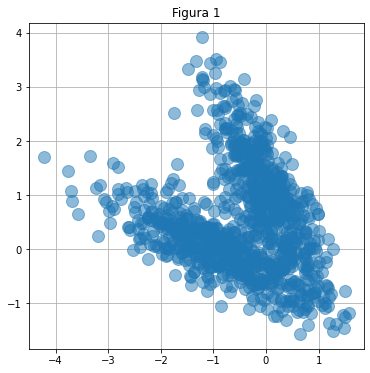

In [10]:
# Generate Data
N = 500

case_data = 'mixGaussian'#'rings'

if case_data == 'mixGaussian':
    # Mixture of Gaussians
    mu1 = [-1.0, 0.0]
    mu2 = [-0.0, 1.0]
    S1 = [[1.0, -0.5],[0.0, 0.1]]
    S2 = [[0.1, 0.0],[-0.5, 1.0]]
    data = np.concatenate((np.random.multivariate_normal(mu1, S1, N),
                           np.random.multivariate_normal(mu2, S2, N)))
elif case_data == 'rings':
    # Rings
    phi = np.pi*np.random.randn(N, 1)
    A = np.random.rand(N, 1)
    x = np.concatenate((A*np.sin(phi), A*np.cos(phi)), axis=1)
    phi = np.pi*np.random.randn(N, 1)
    A = 2 + 2*np.random.rand(N, 1)
    y = np.concatenate((A*np.sin(phi), A*np.cos(phi)), axis=1)
    data = np.concatenate((x, y), axis=0)
else:
    print('Wrong option!')

fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(1,1,1)
ax.plot(data[:, 0], data[:, 1], marker='o', linewidth=0, alpha=0.5, markersize=12)
ax.grid()
ax.set_title('Figura 1')

In [11]:
pca = PCA(n_components=2)
pca.fit(data)
print("Eigenvalues:")
print(pca.explained_variance_)
I = np.argmax(pca.explained_variance_)

# Pca projetion
x_range = np.linspace(-4.0, 4.0, num=100)
y_range = np.linspace(-4.0, 4.0, num=100)
X, Y = np.meshgrid(x_range, y_range)
V_projected_pca = np.zeros(shape=(X.shape[0], X.shape[1], 2))
for i in range(X.shape[0]):
    V_projected_pca[i, :, :] = pca.transform(np.stack([X[i,:],Y[i,:]]).T)

Eigenvalues:
[1.04756652 0.71211306]


In [12]:
def correntropy(x, y, s):
    N = len(x)
    V =  np.average(np.exp(-0.5*(x - y)**2/s**2))
    CIP = 0.0 # mean in feature space should be subtracted!!
    for i in range(0, N):
        CIP += np.average(np.exp(-0.5*(x- y[i])**2/s**2))/N
    return V - CIP

FloatSlider(value=5.031, continuous_update=False, description='Kernel size factor', layout=Layout(width='60%')…

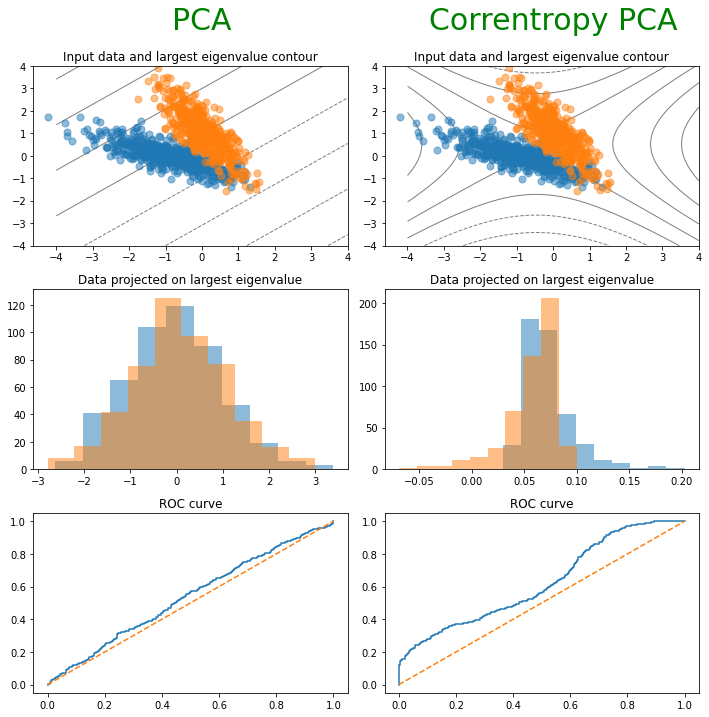

In [13]:
slider_ks = widgets.FloatSlider(description='Kernel size factor', value=0.2, 
                                min=0.001, max=10.0, step=0.001, continuous_update=False)
slider_ks.layout.width='60%'

X, Y = np.meshgrid(x_range, y_range)
V_projected = np.zeros(shape=(X.shape[0], X.shape[1], 2))
data_proj = np.zeros(shape=(N*2, 2))
plt.close()
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(3,2,2)
ax0 = fig.add_subplot(3,2,4)
ax1 = fig.add_subplot(3,2,6)

# Show PCA projection 
ax_pca_0 = fig.add_subplot(3,2,1)
ax_pca_0.set_title('Input data and largest eigenvalue contour')
ax_pca_0.text(0, 6, 'PCA', verticalalignment='center', horizontalalignment='center',color='green', fontsize=30)
ax_pca_0.contour(X, Y, V_projected_pca[:, :, I], alpha=0.5,origin='lower',linewidths=1, colors='k')
ax_pca_0.plot(data[:N, 0], data[:N, 1], marker='o', linewidth=0, alpha=0.5, markersize=7)
ax_pca_0.plot(data[N:, 0], data[N:, 1], marker='o', linewidth=0, alpha=0.5, markersize=7)

ax_pca_1 = fig.add_subplot(3,2,3)
data_proj = pca.transform(data)
ax_pca_1.set_title('Data projected on largest eigenvalue')
ax_pca_1.hist(data_proj[:N, I], alpha=0.5)
ax_pca_1.hist(data_proj[N:, I], alpha=0.5)

ax_pca_2 = fig.add_subplot(3,2,5)
ax_pca_2.set_title('ROC curve')
labels = np.zeros(shape=(2*N,))
labels[N:] = 1.0
fpr, tpr, th = roc_curve(labels, data_proj[:, I])
ax_pca_2.plot(fpr, tpr, '-')
ax_pca_2.plot([0.0, 1.0], [0.0, 1.0], '--')



def plot_figs(ks):
    

    # Compute correntropy matrix and get eigenvalues
    V = pairwise_distances(data.T, metric=lambda u,v:correntropy(u,v,ks))
    eigval, eigvec = np.linalg.eigh(V)
    I = np.argmax(eigval)
    
    for i in range(2*N):
        data_proj[i, :] = np.dot(eigvec, np.average(np.exp(-0.5*(data - data[i,:])**2/ks**2), axis=0))

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            V_projected[i, j, :] = np.sum(eigvec*np.average(np.exp(-0.5*(data - [X[i,j], Y[i,j]])**2/ks**2), axis=0), axis=1)

    ax.cla()
    ax.set_title('Input data and largest eigenvalue contour')
    ax.text(0, 6, 'Correntropy PCA', verticalalignment='center', horizontalalignment='center',color='green', fontsize=30)
    ax.contour(X, Y, V_projected[:, :, I],  alpha=0.5,origin='lower',linewidths=1, colors='k')
    ax.plot(data[:N, 0], data[:N, 1], marker='o', linewidth=0, alpha=0.5, markersize=7)
    ax.plot(data[N:, 0], data[N:, 1], marker='o', linewidth=0, alpha=0.5, markersize=7)
    ax0.cla()
    ax0.set_title('Data projected on largest eigenvalue')
    ax0.hist(data_proj[:N, I], alpha=0.5)
    ax0.hist(data_proj[N:, I], alpha=0.5)
    ax1.cla()
    ax1.set_title('ROC curve')
    labels = np.zeros(shape=(2*N,))
    labels[:N] = 1.0
    fpr, tpr, th = roc_curve(labels, data_proj[:, I])
    ax1.plot(fpr, tpr, '-')
    ax1.plot([0.0, 1.0], [0.0, 1.0], '--')
# plt.tight_layout()        
plot_figs(slider_ks.value)
plt.tight_layout()
display(slider_ks)




def callback_ks(change):
    ks_factor = change['new']
    plot_figs(ks_factor)
    
    clear_output(wait=True)
    display(slider_ks)
    display(fig)

slider_ks.observe(callback_ks,names='value')